In [1]:
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2019, 1, 1)
end = datetime.today()

In [2]:
df_rsp = web.DataReader('RSP', 'iex', start, end)

In [3]:
rsp = df_rsp[['close']].assign(returns=df_rsp['close'].pct_change())
rsp = rsp.assign(cumreturns=rsp['returns'].cumsum())
rsp.head()

,close,returns,cumreturns
date,,,
2019-01-02,91.0309,NaN,NaN
2019-01-03,89.2690,-0.019355,-0.019355
2019-01-04,92.2353,0.033229,0.013874
2019-01-07,93.2009,0.010469,0.024343
2019-01-08,94.2063,0.010787,0.035130


In [4]:
rsp['returns'].fillna(0).values.sum()

0.16878673574851188

In [5]:
df_spy = web.DataReader('SPY', 'iex', start, end)

In [6]:
spy = df_spy[['close']].assign(returns=df_spy['close'].pct_change())
spy = spy.assign(cumreturns=spy['returns'].cumsum())
spy.head()

,close,returns,cumreturns
date,,,
2019-01-02,249.0827,NaN,NaN
2019-01-03,243.1389,-0.023863,-0.023863
2019-01-04,251.2830,0.033496,0.009633
2019-01-07,253.2643,0.007885,0.017518
2019-01-08,255.6438,0.009395,0.026913


In [7]:
spy['returns'].fillna(0).values.sum()

0.15505223079993835

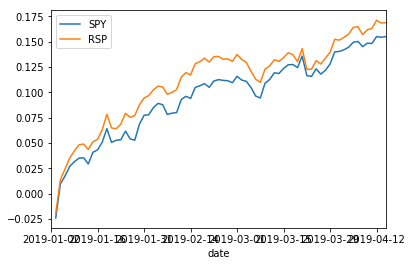

In [8]:
df_returns = spy[['cumreturns']].join(
    rsp[['cumreturns']], lsuffix='_spy', rsuffix='_rsp'
).rename(columns={
    'cumreturns_spy': 'SPY',
    'cumreturns_rsp': 'RSP',
})
df_returns.plot()